# iFood Customer Analysis and Campaign Optimization




## Introduction
This notebook presents an analysis of customer data for iFood, Brazil's leading food delivery app. The primary goal is to optimize marketing campaigns and improve customer engagement through data-driven insights and predictive modeling.

### Project Context
iFood, operating in the retail food sector, faces challenges in maintaining profit growth. To address this, the company aims to enhance its marketing performance, particularly in direct marketing campaigns. A recent pilot campaign for a new product resulted in a loss, highlighting the need for a more targeted approach.

### Objectives
1. Explore customer data to uncover meaningful insights
2. Develop a customer segmentation based on behavioral patterns
3. Create a predictive model to maximize the profitability of future marketing campaigns

### Dataset Overview
The analysis is based on a sample dataset containing:
- Customer demographic information
- Past purchase behavior
- Responses to the recent pilot campaign


### Methodology
This project will follow these key steps:
1. Data Exploration and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Customer Segmentation
4. Predictive Model Development
5. Results Interpretation and Business Recommendations

### Expected Outcomes

By the end of this analysis, we aim to provide:
- Clear insights into customer characteristics and behaviors
- A robust customer segmentation model
- A predictive model to identify high-potential customers for future campaigns
- Actionable recommendations to improve campaign profitability

## Table of Contents

1. [Data Loading and Initial Exploration](#1-data-loading-and-initial-exploration)
2. [Data Cleaning and Preprocessing](#2-data-cleaning-and-preprocessing)
3. [Exploratory Data Analysis](#3-exploratory-data-analysis)
4. [Customer Segmentation](#4-customer-segmentation)
5. [Predictive Model Development](#5-predictive-model-development)
6. [Model Evaluation and Interpretation](#6-model-evaluation-and-interpretation)
7. [Business Insights and Recommendations](#7-business-insights-and-recommendations)
8. [Conclusion and Next Steps](#8-conclusion-and-next-steps)

Let's begin our analysis by loading the necessary libraries and examining our dataset.

### Data Loading and Initial Exploration

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pointbiserialr

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/ifood_df.csv')
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


### **Investigate Data**

### **Looking for missing values**

Superisingly, there is no missing values in the data and there are 2,205 observations in the dataset.

In [3]:
df.shape

(2205, 39)

In [10]:
df.isna().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


### **Checking column types**

All column types look good. there's no need to change the data types.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

### **Assessing unique values**

Let's check the unique values in each column. if a column has the same values then then we cannot use this column in our analysis and can remove it from the datafram.

In [14]:
df.nunique()

,0
Income,1963
Kidhome,3
Teenhome,3
Recency,100
MntWines,775
MntFruits,158
MntMeatProducts,551
MntFishProducts,182
MntSweetProducts,176
MntGoldProds,212


In [26]:
# displaying the unique values
for col in ['Z_CostContact','Z_Revenue']:
  # print(f'{col}:{df[col].unique()}')
  print(f'{col}:{df[col].value_counts()}')

Z_CostContact:Z_CostContact
3    2205
Name: count, dtype: int64
Z_Revenue:Z_Revenue
11    2205
Name: count, dtype: int64


columns **Z_CostContact** and **Z_Revenue** have all the same values. these columns will not hel us to understand our customers better. We can drop these columns from the dataframe.

In [27]:
df.drop(columns=['Z_CostContact','Z_Revenue'], inplace= True)

### **Data Exploration**

In this section:
- Box plot for the total amount spent on all products(MntTotal).
- Outliers.
- Box plot and histogram for income.
- Histogram for matrix.
- Point-Biserial correlations for binary variables.

### Box plot for the total amount spent on all products(MntTotal).

Our analysis will be focused on the total amount spent on all products (MntTotal), Boxplot will help us to find outliers if any.

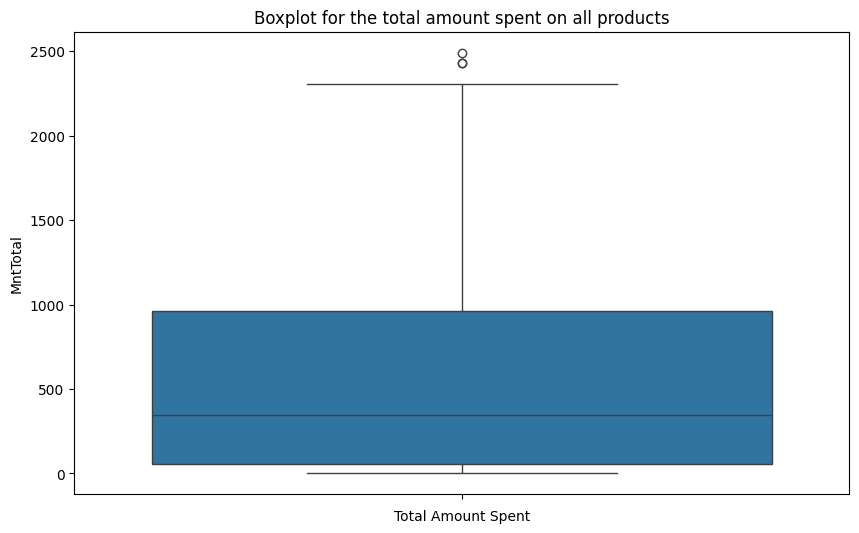

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, y='MntTotal')
plt.title('Boxplot for the total amount spent on all products')
plt.xlabel('Total Amount Spent')
plt.show()

### **Outliers**

the Boxplot spotted a few outliers in the MntTotal, Let's take a look at the outliers.

In [33]:
Q1 = df['MntTotal'].quantile(.25)
Q3 = df['MntTotal'].quantile(.75)
IQR = Q3 - Q1

Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

print(f'Lower bound: {Lower_bound}')
print(f'Upper bound: {Upper_bound}')

outliers = df[(df['MntTotal'] > Upper_bound) | (df['MntTotal'] < Lower_bound)]
outliers.head()

Lower bound: -1306.0
Upper bound: 2326.0


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,1,3,4,10,1,0,0,1,0,0,0,0,29,2295,0,0,1,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,1,7,11,10,4,1,0,1,1,0,0,1,32,2496,0,0,0,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,1,3,4,10,1,0,0,1,0,0,0,1,29,2295,0,0,1,0,0,0,0,0,1,0,2429,2333,1


In [36]:
data = df[(df['MntTotal'] > Lower_bound) & (df['MntTotal'] < Upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,2.320163,4.100363,2.640327,5.817893,5.341508,0.073569,0.074478,0.071753,0.064033,0.013624,0.009083,0.150318,51.124432,2512.923706,0.104450,0.387829,0.215713,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,1.886763,2.738390,2.794583,3.240334,2.411466,0.261128,0.262606,0.258137,0.244867,0.115950,0.094891,0.357464,11.687703,202.594957,0.305914,0.487366,0.411409,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,2339.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


### Box plot and histogram forincome

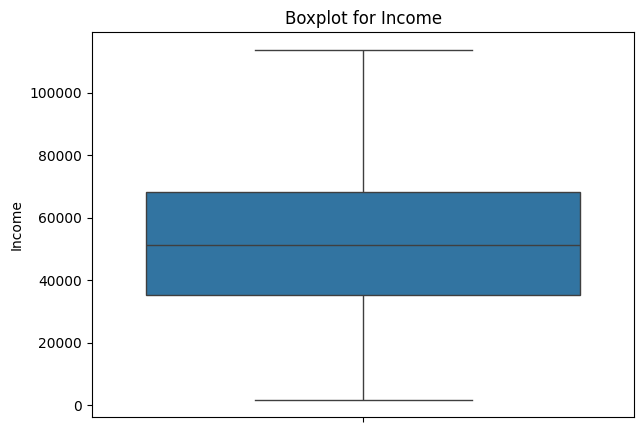

In [37]:
plt.figure(figsize=(7,5))
sns.boxplot(data = data, y = 'Income')
plt.title('Boxplot for Income')
plt.ylabel('Income')
plt.show()

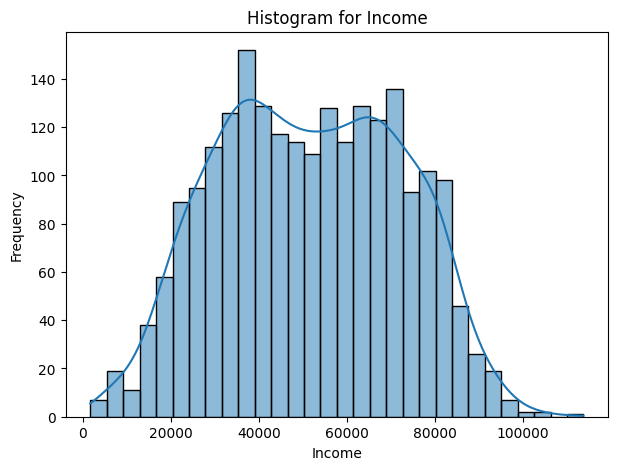

In [39]:
plt.figure(figsize=(7,5))
sns.histplot(data = data, x = 'Income', bins=30, kde = True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

> Income distribution is close to bell curve 'normal' distribution with no outliers.

### **Histogram for age**

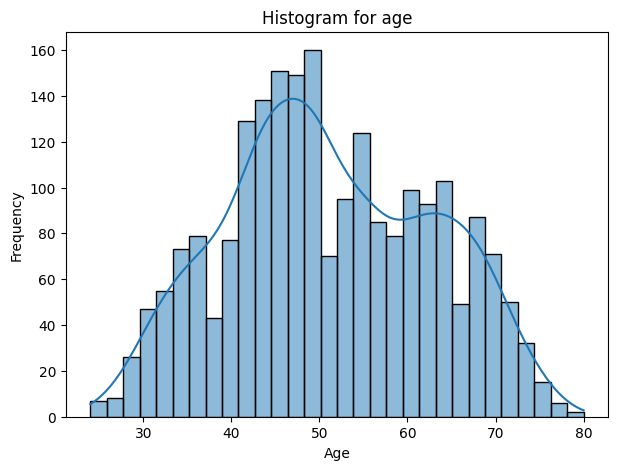

In [40]:
plt.figure(figsize=(7,5))
sns.histplot(data = data , x= 'Age', bins = 30, kde = True)
plt.title('Histogram for age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [57]:
print(f"skewness:{data['Age'].skew():.2f}")
print(f"kurtosis:{data['Age'].kurt():.2f}")

skewness:0.09
kurtosis:-0.80


The age distribution in our dataset shows minimal skewness (0.09) and negative kurtosis (-0.80).

The near-zero skewness indicates that the age distribution is almost symmetrical, with a very slight tendency towards older ages. This suggests a well-balanced age range in our sample.

The negative kurtosis implies that the distribution has lighter tails and a flatter peak compared to a normal distribution. This means we have fewer extreme age values (very young or very old) than we would expect in a normal distribution, and the ages are more spread out across the range rather than clustered around the mean.

Overall, these statistics suggest a relatively uniform age distribution without significant outliers or age group concentrations.

### **Correlation matrix**

There are many columns in the data? The correlation matrix will be vary crowded if we use all columns of the dataset. we will group the columns and sxplore correlation between coluns in each group and the column'MntToatal'. we will focus on the column 'MntTotal' to understand how we can segment to customers who buy the most in overall. we can run similar analysis for every type of product.

In [58]:
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

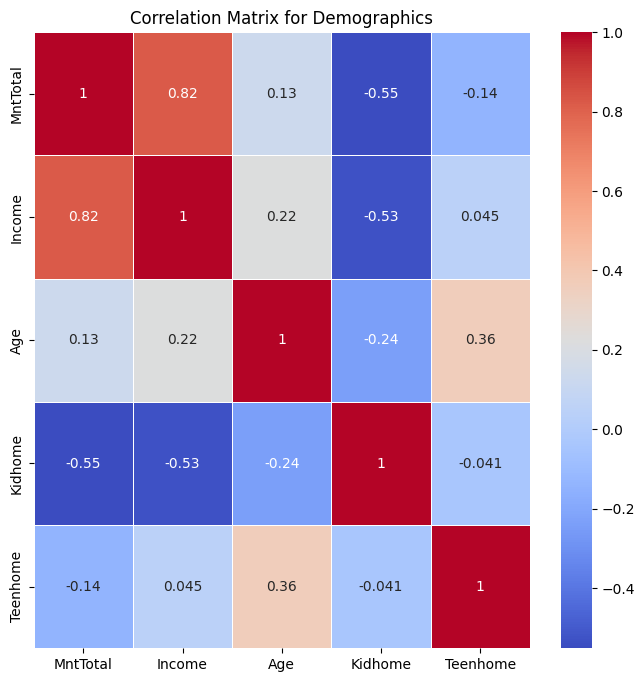

In [60]:
corr_matrix = data[['MntTotal'] + cols_demographics + cols_children].corr()

plt.figure(figsize= (8,8))
sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Demographics')
plt.show()

>MntToatal has stron positive correlation with income and intermediate negative correlation KidHome. Income feature has nearly the same negative correlation with the KidHome and MntTotal.

### **Point-Biserial correlations for binary variables**

Pearson correlation measures the strength and direction of a *linear relationship* between two continuous variables. We used Pearson correlation for MntTotal, Age and Income. When we try to understand the relationship between a continuous variable MntTotal and binary variables like marital status then we should use Point-Biserial Correlation Point-Biserial Correlation is used to measure the strength and direction of the linear relationship between a binary variable and a continuous variable

In [65]:
for col in cols_education:
  correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
  print(f'point-biserial correlation for {col} is :{correlation: .4f}.  with the p-value of : {p_value :.4f}')

point-biserial correlation for education_2n Cycle is :-0.0593.  with the p-value of : 0.0054
point-biserial correlation for education_Basic is :-0.1389.  with the p-value of : 0.0000
point-biserial correlation for education_Graduation is : 0.0159.  with the p-value of : 0.4551
point-biserial correlation for education_Master is : 0.0004.  with the p-value of : 0.9842
point-biserial correlation for education_PhD is : 0.0737.  with the p-value of : 0.0005


there is no strong Point-Biserial correlation bewtween MntTotal and various education levels.

### **Feature Engineering**

In this section:
- new feature : Marital
- New feature : in_relationship

### **New feature: Marital**

the data frame contains 5 columns to reflect marital status. we are going to create a new column 'marital' with values: Divorced, Married, single, Together, Widow. this column will allow us to draw some additional plots.

In [67]:
def get_marital_status(row):
  if row['marital_Divorced'] == 1:
    return 'Divorced'
  elif row['marital_Married'] == 1:
    return 'Married'
  elif row['marital_Single'] == 1:
    return 'Single'
  elif row['marital_Together'] == 1:
    return 'Together'
  elif row['marital_Widow'] == 1:
    return 'Widow'
  else:
    return 'Unknown'

data['Marital'] = data.apply(get_marital_status, axis =1)

In [68]:
data['Marital'].head()

,Marital
0,Single
1,Single
2,Together
3,Together
4,Married


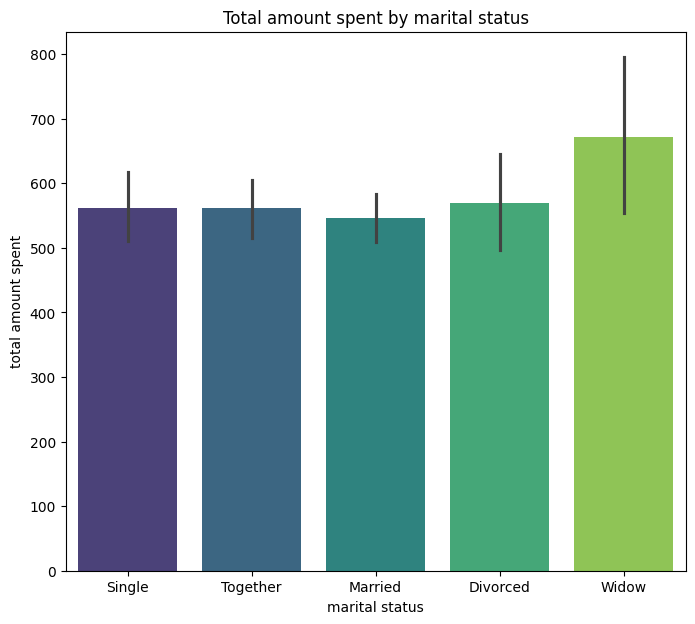

In [69]:
plt.figure(figsize= (8,7))
sns.barplot(data = data, x='Marital', y='MntTotal', palette = 'viridis')
plt.title('Total amount spent by marital status')
plt.xlabel('marital status')
plt.ylabel('total amount spent')
plt.show()

### **New feature: in_relationship**

there are 3 features that reflect if a person is single (single, divorced, widow) and 2 features if a person is in relationship(together, married).
we will add an additional feature 'In_relationship'. this feature will equal 1 if a customer's marital status is 'Married' or 'Together' and 0 in all other cases.

In [70]:
def get_in_relationship(row):
  if row['Marital'] == 'Married' or row['Marital'] == 'Together':
    return 1
  else:
    return 0

data['In_relationship'] = data.apply(get_in_relationship, axis=1)

In [71]:
data['In_relationship'].head()

,In_relationship
0,0
1,0
2,1
3,1
4,1


### **K-Means Clustering**

K-means clustering is an unsupervised machine learning algorithm used to cluster data based on similraty. k-means clustering usually works well in practice and scales well to the large dataset.

in this section section:

- standardising data.
- principal compoent analysis (PCA).
- Elbow method.
- silhouette score analysis.

### **Standardising data**

K-means clustering algorithm is based on the the calculation of distances between data points to form clsters. when features have differnt scales, features with larg scales can disproportionately influence the distance calculation. there are various ways to standardise features, we will use standard scaling.


In [133]:
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']

scaler = StandardScaler()
data_scaled = data.copy()

data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.202000e+03,2.202000e+03,2.202000e+03
mean,2.742785e-17,-8.873717e-17,-4.678869e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.410685e+00,-9.724232e-01,-1.348874e+00
25%,-7.926475e-01,-8.815089e-01,-1.348874e+00
50%,-1.508040e-02,-3.806058e-01,7.413589e-01
75%,8.017617e-01,7.024988e-01,7.413589e-01
max,3.006747e+00,3.048788e+00,7.413589e-01


In [134]:
data[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2202.000000,2202.000000,2202.000000
mean,51570.283379,560.193915,0.645322
std,20679.438848,572.096830,0.478524
min,1730.000000,4.000000,0.000000
25%,35182.500000,56.000000,0.000000
50%,51258.500000,342.500000,1.000000
75%,68146.500000,962.000000,1.000000
max,113734.000000,2304.000000,1.000000


> the mean value for all columns is almost zero and the standard deviation is almost 1. all the data points were replaced by their z-scores (meaning For each feature X, it calculates:
z = (X - μ) / σ
where μ is the mean and σ is the standard deviation of the feature.)


### **principal component analysis (PCA)**

PCA is a technique of dimensionality reduction. PCA takes the original features(dimensions) and create new features that capture the most variance of the data.

In [135]:
pca =  PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])

data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

### **Elbow method**

the elbow method is a technique used to determine the optimal *number* of clusters(K) for k_means clustering algorithm

In [136]:
x = data_scaled[cols_for_clustering]
inertia_list = []
for k in range(2, 10):
  inertia = KMeans(n_clusters= k, random_state= 42).fit(x).inertia_
  inertia_list.append(inertia)

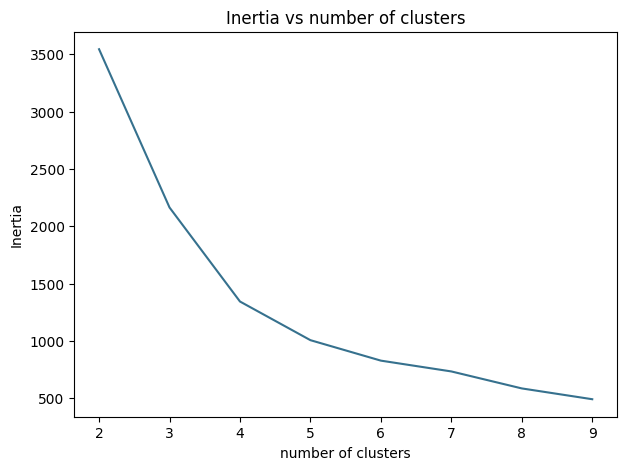

In [137]:
plt.figure(figsize=(7,5))
plt.plot(range(2,10), inertia_list,  color='#36718e')
plt.title('Inertia vs number of clusters')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.show()

> Elbow methode suggests 4 or 5 clusters. let's check silhouette score.

### **Silhoutte score analysis**

Silhouette score is metric that used to assess the quality of clustering. A higher Silhouette score indicates that the clusters are well_seperated,
while a lower score suggest that the clusters may overlap or are poorly defined.

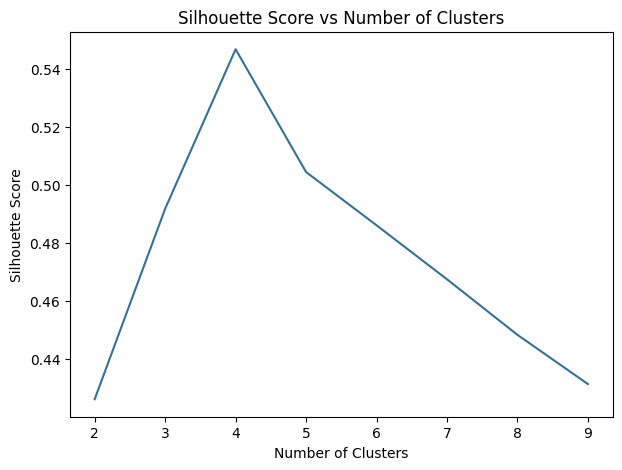

In [138]:
# Define range of clusters
cluster_range = range(2, 10)

# Use list comprehension
silhouette_scores = [
    silhouette_score(x, KMeans(n_clusters=k, random_state=42).fit_predict(x))
    for k in cluster_range
]

# Plot setup
plt.figure(figsize=(7, 5))
plt.plot(cluster_range, silhouette_scores, color='#36718e')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [139]:
model = KMeans(n_clusters= 4, random_state = 42)
model.fit(data_scaled[cols_for_clustering])
data_scaled['clusters'] = model.predict(data_scaled[cols_for_clustering])

In [140]:
data_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship,cluster,pc1,pc2,clusters
0,0.317669,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,2822,0,0,1,0,0,0,0,1,0,0,1.693815,1441,0,Single,-1.348874,2,1.455789,-1.319249,2
1,-0.252786,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,2272,0,0,1,0,0,0,0,1,0,0,-0.942701,15,0,Single,-1.348874,2,-0.811291,-1.366361,3
2,0.969430,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,2471,0,0,0,1,0,0,0,1,0,0,0.303874,692,0,Together,0.741359,0,0.881451,0.766825,0
3,-1.205543,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,2298,0,0,0,1,0,0,0,1,0,0,-0.895496,43,0,Together,0.741359,1,-1.503762,0.702395,1
4,0.325166,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,2320,0,1,0,0,0,0,0,0,0,1,-0.267837,392,0,Married,0.741359,0,0.021901,0.744923,1


### **Exploration of clusters**

in this section:
- visualisation of clusters
- mean consumption of different product types by cluster
- cluster sizes
- in_relationship feature by cluster

### **Visualisation of clusters**

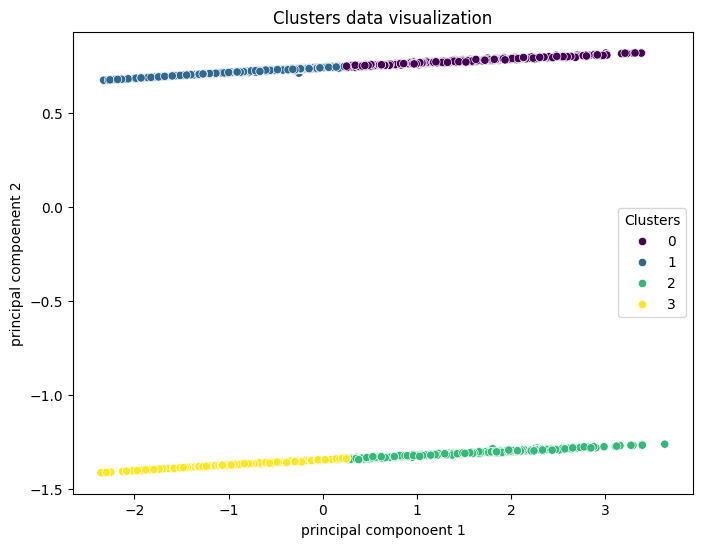

In [141]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = data_scaled, x='pc1', y = 'pc2', hue='clusters',palette='viridis')
plt.title('Clusters data visualization')
plt.xlabel('principal componoent 1')
plt.ylabel('principal compoenent 2')
plt.legend(title='Clusters')
plt.show()

In [142]:
data['cluster'] = data_scaled.clusters
data.groupby('cluster')[cols_for_clustering].mean()

,Income,MntTotal,In_relationship
cluster,,,
0,71914.598930,1153.197861,1.0
1,38027.656977,160.412791,1.0
2,71946.155488,1159.612805,0.0
3,37332.339956,150.761589,0.0


### **Mean consumption of different product types by cluster**

In [143]:
mnt_data = data.groupby('cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,1153.197861,1082.465241,625.964349,52.814617,343.479501,75.959002,54.980392,70.732620
1,1,160.412791,135.405814,93.372093,7.689535,39.789535,11.547674,8.013953,25.006977
2,2,1159.612805,1085.332317,613.862805,54.929878,357.902439,77.603659,55.314024,74.280488
3,3,150.761589,125.662252,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338


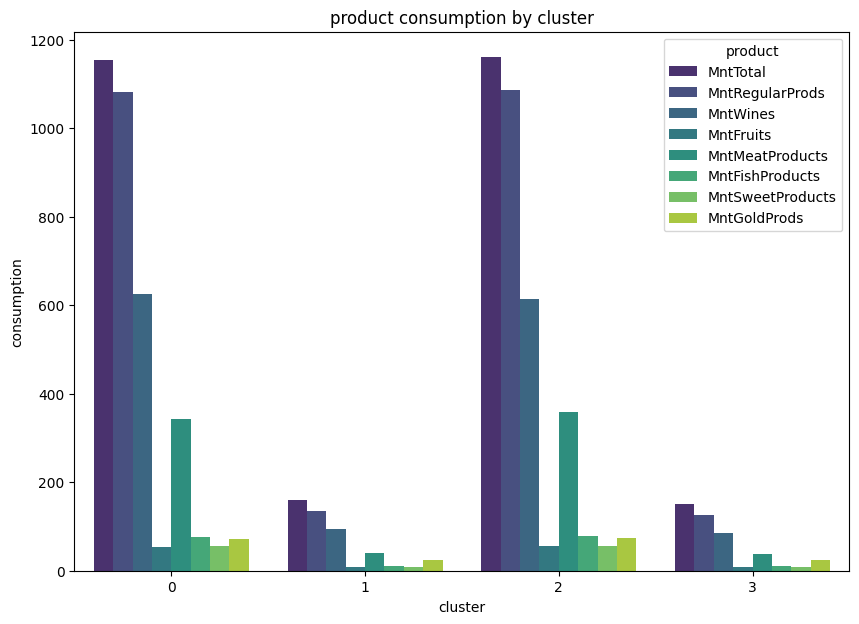

In [144]:
melted_data = pd.melt(mnt_data, id_vars = 'cluster', var_name='product', value_name= 'consumption')

plt.figure(figsize=(10,7))
sns.barplot(x="cluster", y = 'consumption', hue='product', data = melted_data, palette='viridis')
plt.title('product consumption by cluster')
plt.ylabel('consumption')
plt.xticks(rotation=0)
plt.legend(title='product', loc='upper right')
plt.show()

### **cluster sizes**

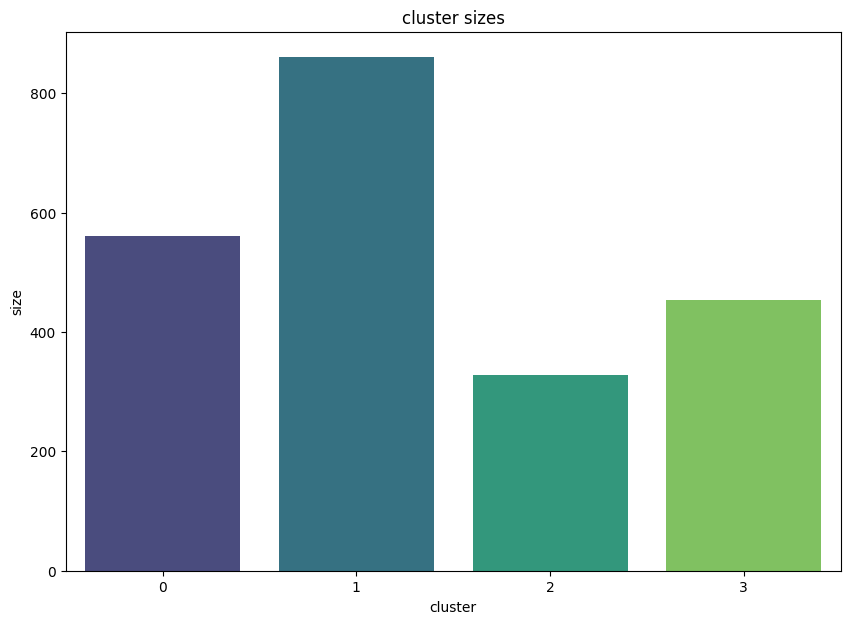

In [145]:
cluster_sizes = data.groupby('cluster')[['MntTotal']].count().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(x='cluster', y ='MntTotal', data= cluster_sizes, palette='viridis')
plt.title('cluster sizes')
plt.xlabel('cluster')
plt.ylabel('size')
plt.show()

In [146]:
cluster_sizes.head()

,cluster,MntTotal
0,0,561
1,1,860
2,2,328
3,3,453


In [147]:
total_rows = len(data)

cluster_sizes['share%'] = round(cluster_sizes['MntTotal'] / total_rows * 100, 0)
cluster_sizes.head()

,cluster,MntTotal,share%
0,0,561,25.0
1,1,860,39.0
2,2,328,15.0
3,3,453,21.0


### **Income by cluster**

Box plot

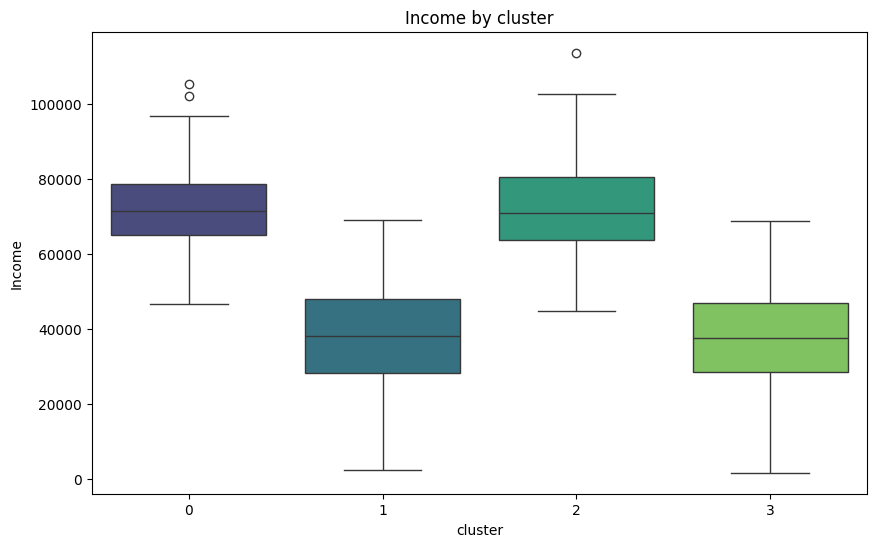

In [148]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cluster', y='Income', data = data, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('cluster')
plt.ylabel('Income')
plt.show()

### **scatter plot**

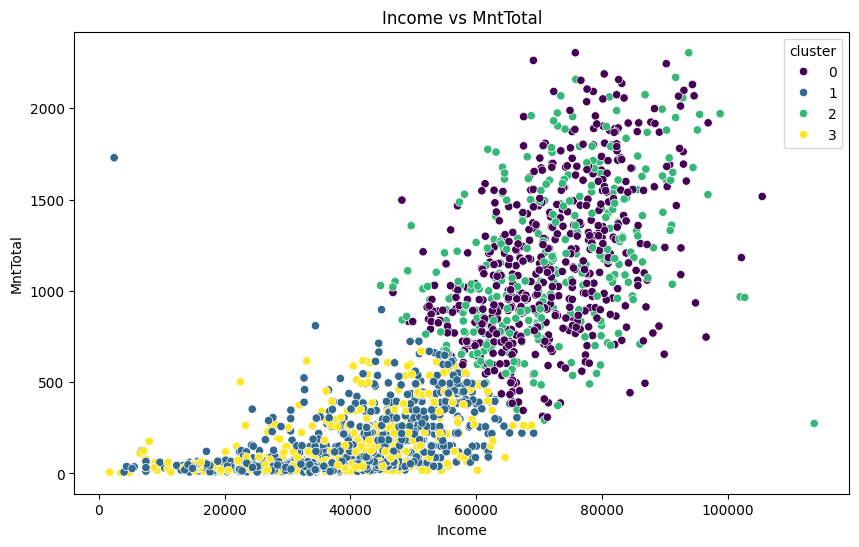

In [149]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Income', y='MntTotal', hue= 'cluster', data= data, palette = 'viridis')
plt.title('Income vs MntTotal')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.show()

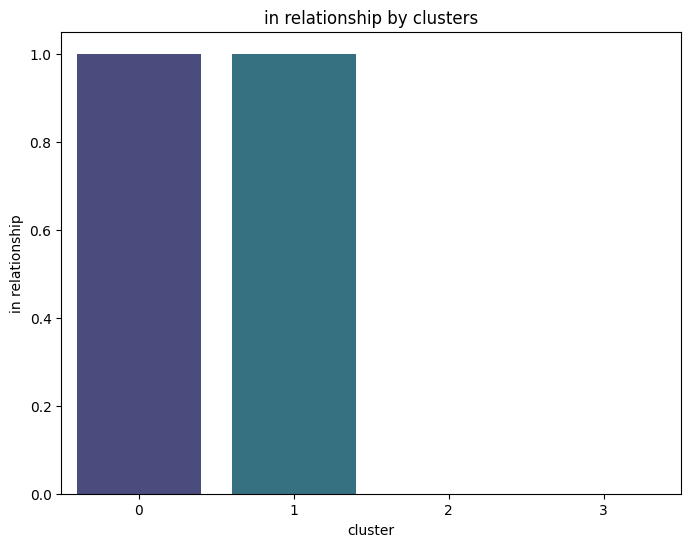

In [150]:
plt.figure(figsize=(8,6))
sns.barplot(x='cluster', y = 'In_relationship', data = data, palette = 'viridis')
plt.title('in relationship by clusters')
plt.xlabel('cluster')
plt.ylabel('in relationship')
plt.show()

<a id="results"></a>
# Results
This section contains the results of the K-means clustering analysis, which aimed to identify distinct customer segments based on the total amount of purchases they made (MntTotal). The analysis utilised 'Income' and 'In_relationship' features.

## Optimal number of clusters = 4
The Elbow Method and Silhouette Analysis suggested 4 clusters (k=4). The elbow method highlighted the number of 4 or 5 clusters as a reasonable number of clusters. The silhouette score analysis revealed a peak silhouette score for k=4.

## Cluster Characteristics
### Cluster 0: High value customers in relationship (either married or together)
- This cluster represents 26% of the customer base
- These customers have high income and they are in a relationship

### Cluster 1: Low value customers in relationship
- This cluster represents 39% of the customer base
- These customers have low income and they are in a relationship


### Cluster 2: High value single customers
- This cluster represents 15% of the customer base
- These customers have high income and they are single


### Cluster 3: Low value single customers
- This cluster represents 21% of the customer base
- These customers have low income and they are single




<a id="recommendations"></a>
# Recommendations
Based on the clusters, tailored marketing strategies can be created. Customers from these segments will have different interests and product preferences.

## Marketing Strategies for Each Cluster

### Cluster 0: High value customers in relationship (either married or together)
- Target with premium, high-quality products suitable for couples or families.
- Offer exclusive "couple" or "family" packages for various product categories.
- Use marketing imagery that resonates with couples and families.
- Implement a VIP program with special perks for high-value customers.

### Cluster 1: Low value customers in relationship
- Focus on value-for-money propositions and family-oriented deals.
- Introduce budget-friendly product bundles for couples or small families.
- Develop a tiered loyalty program to encourage increased spending.
- Use marketing that emphasizes affordability and family economics.

### Cluster 2: High value single customers
- Promote luxury or premium single-serving products.
- Create marketing campaigns focused on personal indulgence and self-care.
- Offer exclusive experiences or products that appeal to single, high-income individuals.
- Use imagery and messaging that celebrates independence and personal success.

### Cluster 3: Low value single customers
- Introduce entry-level products and smaller package sizes.
- Create promotions that bundle complementary products at attractive price points.
- Develop a rewards program that offers incentives for trying new products.
- Use marketing that emphasizes convenience and value for individuals.

## Opportunities for Further Analysis
- Investigate the impact of children on product preferences and purchasing behavior.
- Analyze the influence of education level on customer segmentation and purchasing patterns.
- Conduct an analysis of frequent buyers across all clusters to identify common characteristics.
- Examine the effectiveness of different sales channels (e.g., store, website) for each cluster.
- Evaluate the response to past marketing campaigns for each cluster to refine future strategies.
- If possible, incorporate gender data into the analysis for more nuanced segmentation.
- Test different clustering algorithms to validate and potentially refine the current segmentation.
- Analyze seasonal purchasing patterns within each cluster to optimize inventory and promotions.
- Investigate cross-selling opportunities between clusters based on complementary characteristics.